In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, kendalltau
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_data.csv')

### Metadata
1. Age 
    - 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older
2. Sex 
    - 0 = female, 1 = male
3. HighChol 
    - 0 = no high cholesterol, 1 = high cholesterol
4. CholCheck 
    - 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
5. BMI 
    - Body Mass Index
6. Smoker 
    - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
7. HeartDisease
    - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes
8. PhysActivity
    - physical activity in past 30 days - not including job 0 = no, 1 = yes
9. Fruits
    - Consume Fruit one or more times per day 0 = no, 1 = yes
10. Veggies 
    - Consume Vegetables 1 or more times per day 0 = no, 1 = yes
11. HvyAlcoholConsumption 
    - Adult male: more than 14 drinks per week. Adult female: more than 7 drinks per week. 0 = no, 1 = yes
12. GenHlth 
    - Would you say that in general your health is: (scale 1-5) 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
13. MentHlth 
    - days of poor mental health scale 1-30 days
14. PhysHlth 
    - physical illness or injury days in past 30 days scale 1-30
15. DiffWalk 
    - Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
16. Diabetes 
    - 0 = no diabetes, 1 = diabetes
17. Hypertension 
    - 0 = no hypertension, 1 = hypertension
18. Stroke 
    - 0 = no, 1 = yes  

### EDA

In [3]:
df.head().T

,0,1,2,3,4
Age,4.0,12.0,13.0,11.0,8.0
Sex,1.0,1.0,1.0,1.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0
Smoker,0.0,1.0,0.0,1.0,1.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,1.0,0.0,1.0,1.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0
Veggies,1.0,0.0,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

* All the features are numerical and are of float64 dtype
* However, a quick look indicates that all the features except BMI are of categorical type.

In [5]:
df['BMI'].unique()

array([26., 28., 29., 18., 31., 32., 27., 24., 21., 58., 30., 20., 22.,
       38., 40., 25., 36., 47., 19., 37., 41., 23., 34., 35., 42., 17.,
       33., 44., 15., 52., 69., 56., 45., 39., 92., 53., 98., 50., 46.,
       79., 48., 16., 63., 72., 54., 49., 68., 43., 84., 73., 76., 55.,
       51., 75., 57., 60., 12., 77., 82., 67., 71., 61., 14., 81., 59.,
       86., 13., 87., 65., 95., 89., 62., 64., 66., 85., 70., 83., 80.,
       78., 74.])

There are no decimals in BMI feature. Hence, all the features can be cast as integers.

In [6]:
df = df.astype('int32')

In [7]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

There are no null values.

In [8]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [9]:
df['MentHlth'].unique()

array([ 5,  0,  7,  3,  4,  2, 30, 20,  1, 15, 10, 25, 14, 28,  6, 29, 26,
       12, 16, 22, 13,  8,  9, 21, 18, 17, 27, 24, 23, 11, 19])

In [10]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [11]:
df['Age'].unique()

array([ 4, 12, 13, 11,  8,  1,  6,  3,  7, 10,  9,  5,  2])

In [12]:
cat_cols = ['Age','Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes']

In [13]:
def plot_univariate(col):
    if(df[col].nunique()>2):
        plt.figure(figsize=(10,7))
        h = 0.15
        rot=90
    else:
        plt.figure(figsize=(6,6))
        h = 0.5
        rot=0
    plot = sns.countplot(x = df[col], palette='pastel')
    
    for bars in plot.containers:
        for p in bars:
            plot.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5, p.get_height()), 
                    ha = 'center', va = 'bottom')
            plot.annotate(f'{p.get_height()*100/df[col].shape[0] : .1f}%', (p.get_x() + p.get_width()*0.5, h*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=rot)      

In [14]:
def plot_bivariate(col,hue):    
    if(df[col].nunique()>5):
        plt.figure(figsize=(20,10))   
        rot=90
    else:
        plt.figure(figsize=(10,7))
        rot=0
    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers] #Get the counts of each bar, make arrays when more than one in group
        for bars in ax.containers:
            for i, p in enumerate(bars):
                total = sum(group[i] for group in heights) #Sum total of each group
                percentage = (100 * p.get_height() / total) #Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5,0.8*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=0)
                if(percentage>25.0):
                    percentage = f'{percentage:.1f}%'
                    ax.annotate( percentage, (p.get_x() + p.get_width()*0.5, 0.25*p.get_height()), ha='center', va='center', rotation=rot)


    plot = sns.countplot(x=df[col], hue=df[hue],palette='pastel')
    percentage(plot) 

In [15]:
def spearman(df,hue):
    feature = []
    correlation = []
    result = []
    for col in df.columns:
        corr, p = spearmanr(df[col], df[hue])
        feature.append(col)
        correlation.append(corr)
        alpha = 0.05
        if p > alpha:
            result.append('No correlation (fail to reject H0)')
        else:
            result.append('Some correlation (reject H0)')
    c = pd.DataFrame({'Feature Name':feature,'correlation coefficient':correlation, 'Inference':result})
    display(c)

#### Age

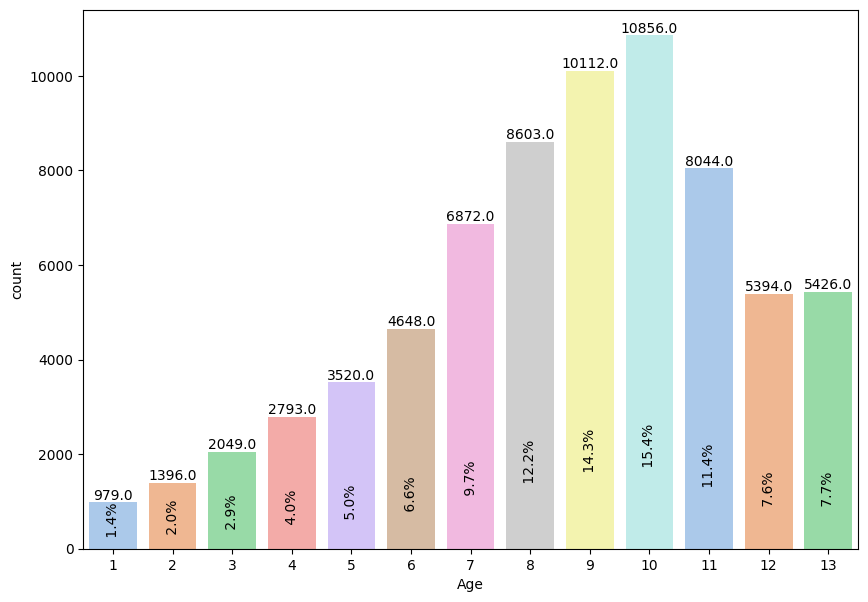

In [16]:
plot_univariate('Age')

* Age group 10 is the most prevalent group. It constitutes of 15.4% of the data.
* The top three groups are 10, 9, 8.
* Group 1 is the least prevalent group.

In [17]:
# plot_bivariate('Age','Hypertension')

**Prevalance of Hypertension in age groups**
* Looking at the counts, in age groups 8, 9, 10, 11, 12, 13, people with hypertension exceed normal cases. 
* There are very few people with hypertension in groups 1, 2, 3 and 4.
* Age group 12 is the most succeptible group. It has 73.2% of cases with hypertension.


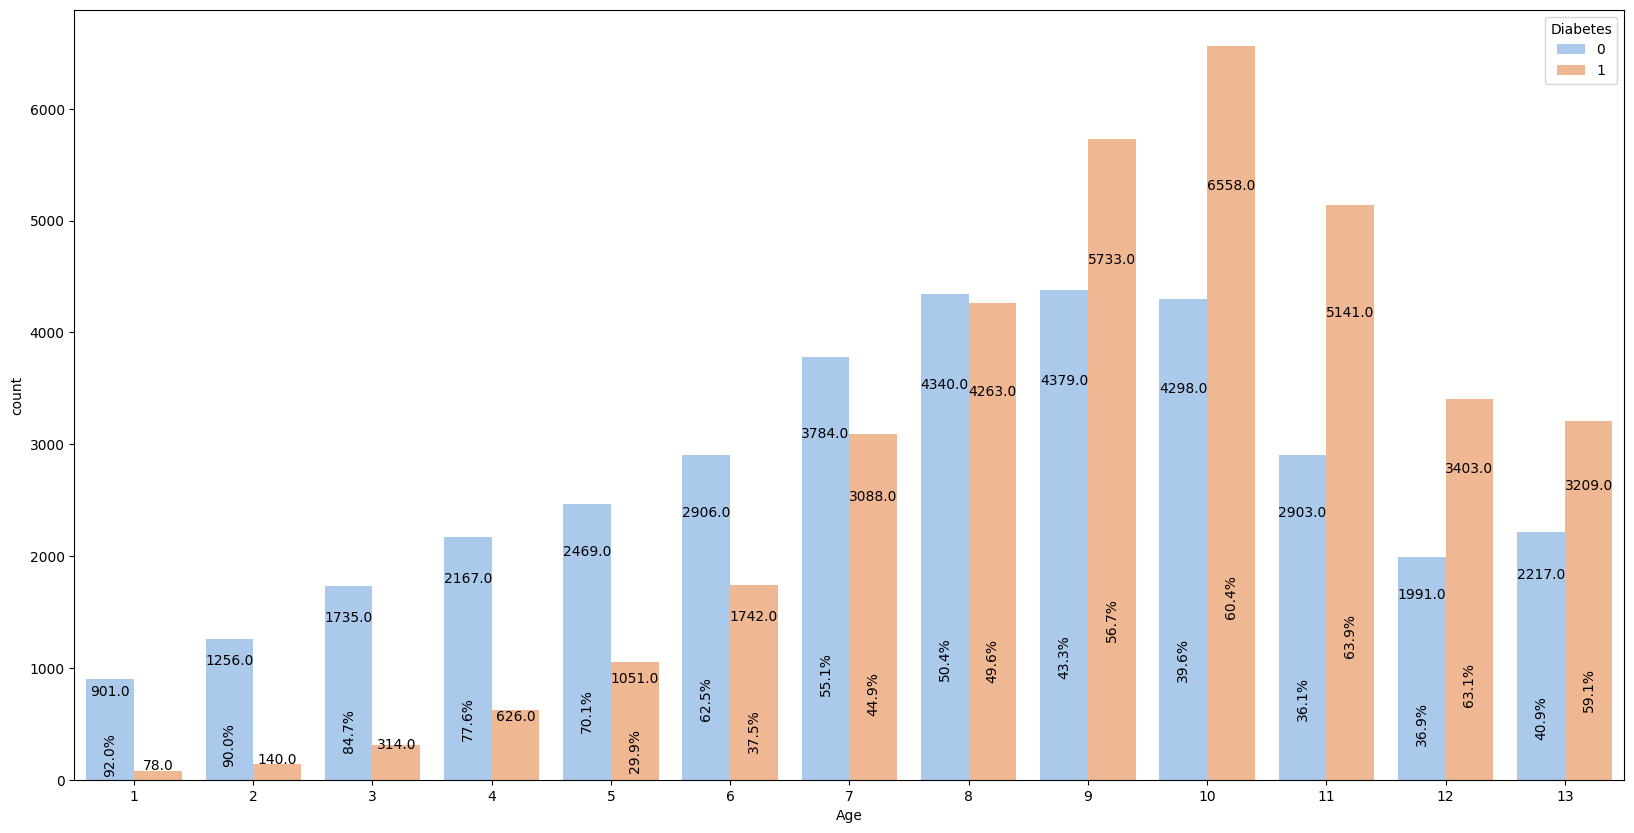

In [18]:
plot_bivariate('Age','Diabetes')

**Prevalance of Diabetes in age groups**
* Looking at the counts, diabetes is prevalant in age groups 9, 10, 11, 12, 13. 
* There are very few people with diabetes in groups 1, 2, 3 and 4.
* Age group 11 is the most succeptible group. It has 63.9% of cases with diabetes.

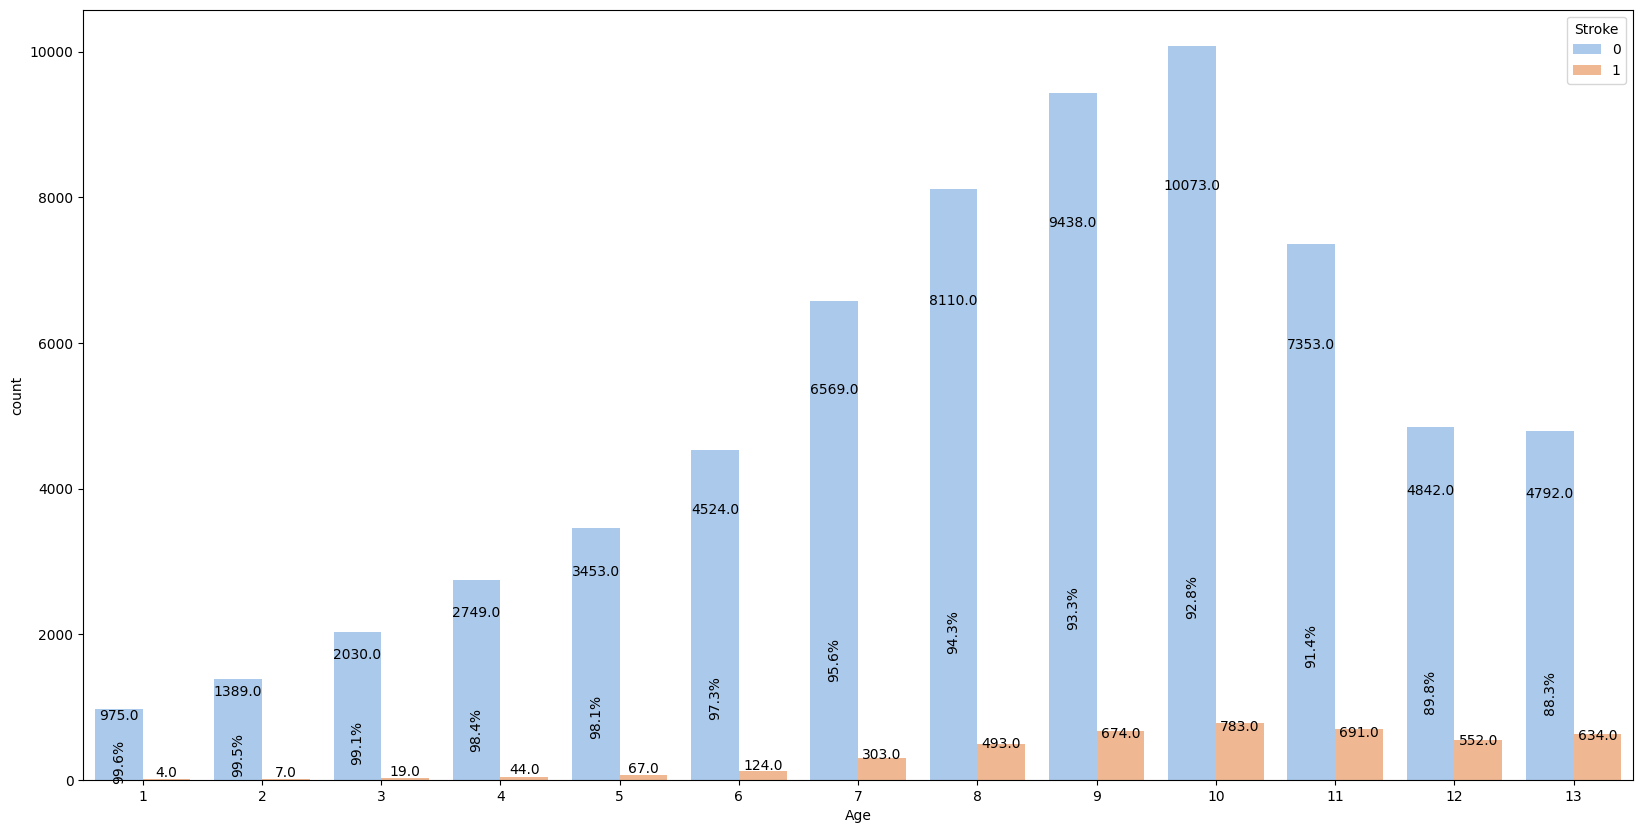

In [19]:
plot_bivariate('Age','Stroke')

**Prevalance of Stroke in age groups**
* Looking at the counts, people who have suffered stroke are not very common.
* Among age groups, obviously older age groups are more succeptible to stroke.
* Stroke is prevalant in age group 13.

In [20]:
spearman(df,'Age')

,Feature Name,correlation coefficient,Inference
0,Age,1.000000,Some correlation (reject H0)
1,Sex,0.000447,No correlation (fail to reject H0)
2,HighChol,0.217974,Some correlation (reject H0)
3,CholCheck,0.099208,Some correlation (reject H0)
4,BMI,-0.038141,Some correlation (reject H0)
5,Smoker,0.098822,Some correlation (reject H0)
6,HeartDiseaseorAttack,0.225231,Some correlation (reject H0)
7,PhysActivity,-0.092685,Some correlation (reject H0)
8,Fruits,0.067778,Some correlation (reject H0)
9,Veggies,-0.017208,Some correlation (reject H0)


#### Sex

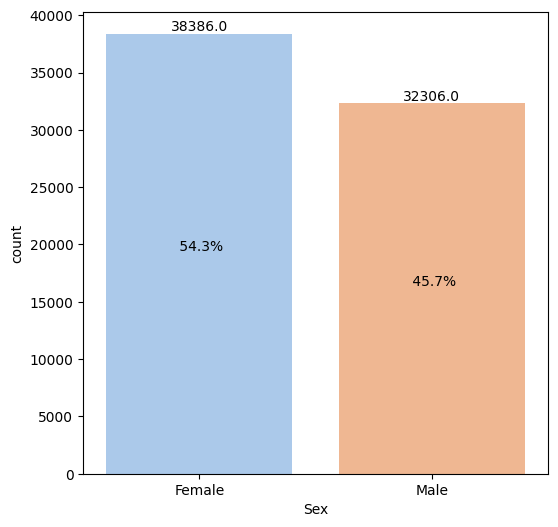

In [21]:
plot_univariate('Sex')
plt.xticks([0,1],['Female','Male']);

There 54.3% of female responders.

In [22]:
# plot_bivariate('Sex','Hypertension')

**Prevalance of Hypertension**
* Eventhough not substantial, men are comparitively hypertensive (58.6%) compared to women.

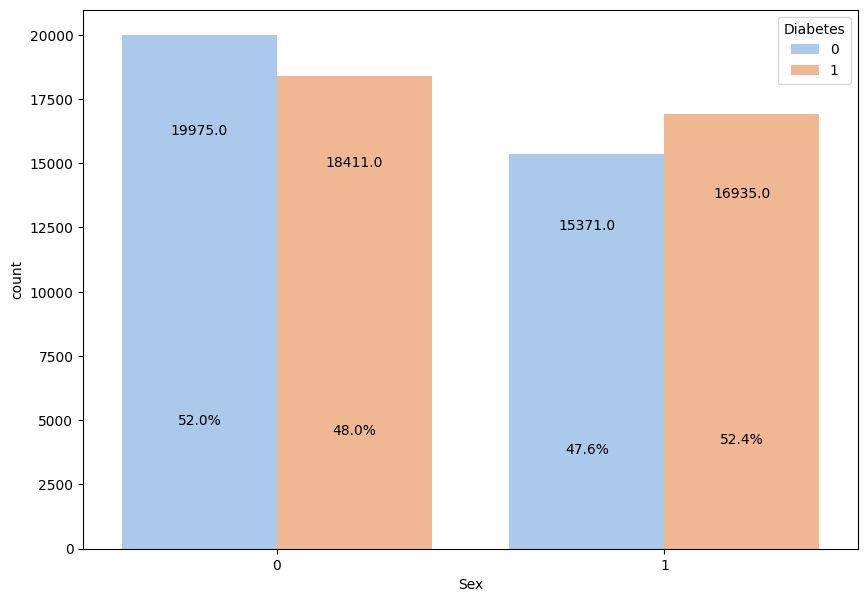

In [23]:
plot_bivariate('Sex','Diabetes')

**Prevalance of Diabetes**
* Prevalance of diabetes is more among men compared to women.

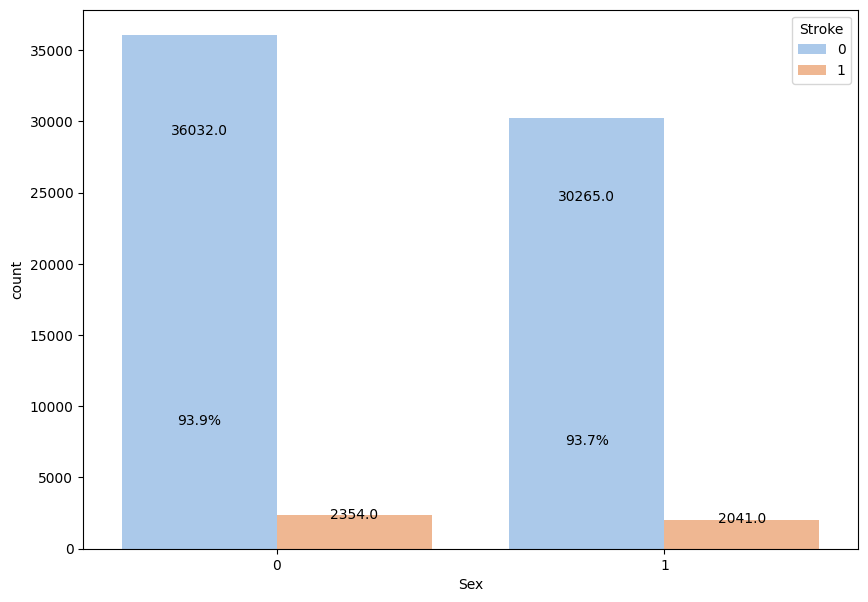

In [24]:
plot_bivariate('Sex','Stroke')

**Prevalance of Stroke**
* Possibility of stroke is not dependent on sex of the patient.

#### HighChol (High Cholesterol)

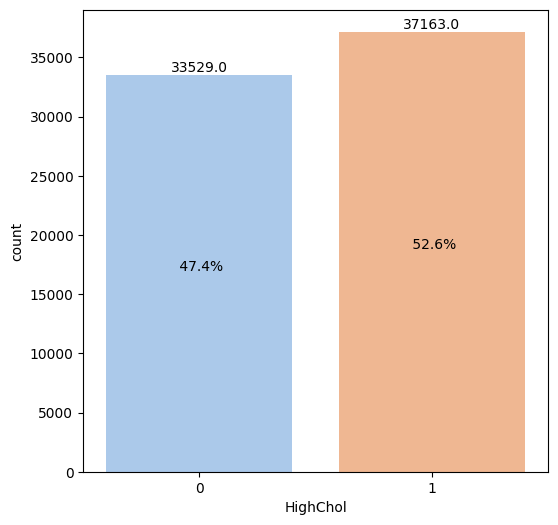

In [25]:
plot_univariate('HighChol')

There more people with high cholesterol condition (52.6 %) compared to normal cases.

In [26]:
# plot_bivariate('HighChol','Hypertension')

**Interaction of Hypertension and High Cholesterol**
* It is significant that 71.3% of people with High Cholesterol readings are hypertensive. 

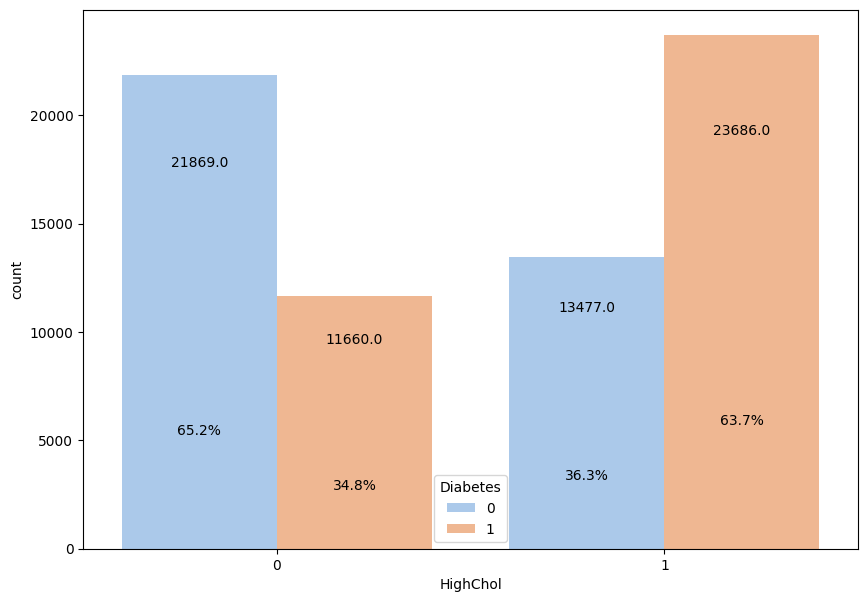

In [27]:
plot_bivariate('HighChol','Diabetes')

**Interaction of Diabetes and High Cholesterol**
* It is significant that 63.7% of people with High Cholesterol readings are diabetic. 

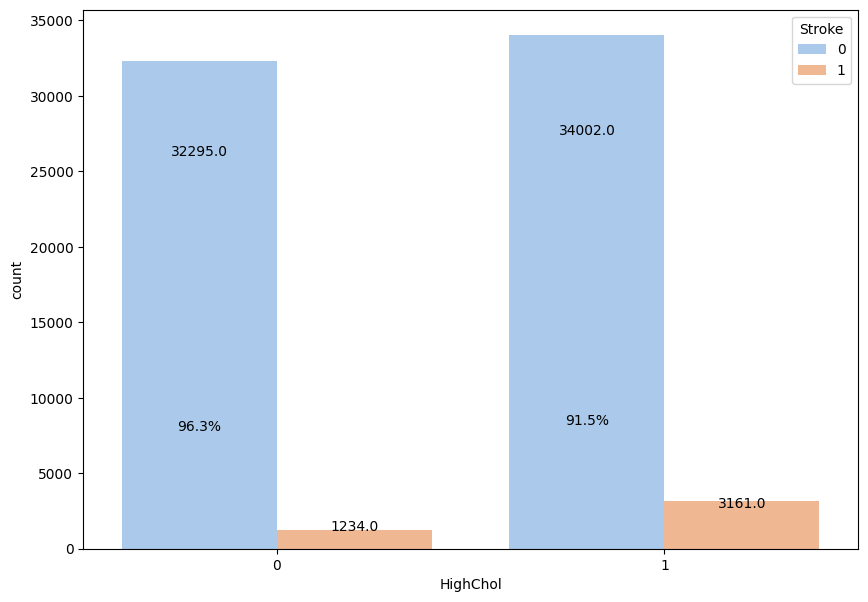

In [28]:
plot_bivariate('HighChol','Stroke')

**Interaction of Stroke and High Cholesterol**
* Again stroke is prevalent among people with High Cholesterol readings.

#### CholCheck (Cholesterol check in last 5yrs)

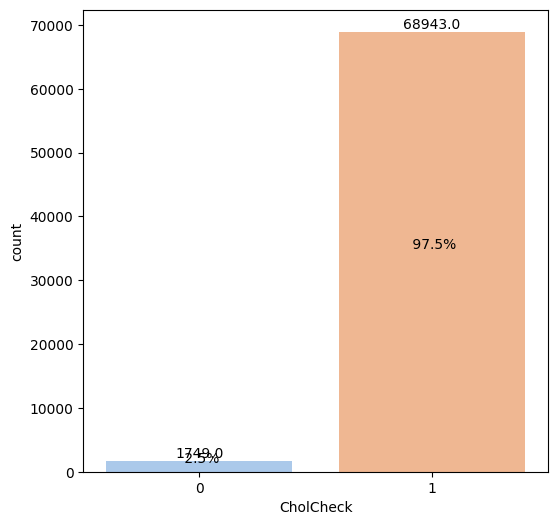

In [29]:
plot_univariate('CholCheck')

This data is not  very useful since 97.5% of the samples have undergone a cholesterol check at least once in the last 5yrs.

#### BMI

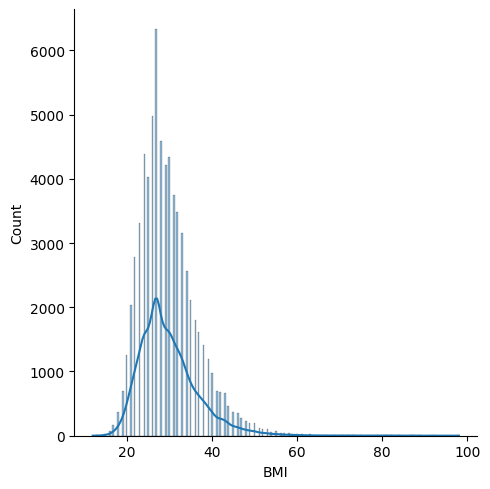

In [30]:
sns.displot(data=df,x='BMI', kde=True,);

In [31]:
spearman(df,'BMI')

,Feature Name,correlation coefficient,Inference
0,Age,-0.038141,Some correlation (reject H0)
1,Sex,0.033498,Some correlation (reject H0)
2,HighChol,0.158339,Some correlation (reject H0)
3,CholCheck,0.054397,Some correlation (reject H0)
4,BMI,1.000000,Some correlation (reject H0)
5,Smoker,0.022429,Some correlation (reject H0)
6,HeartDiseaseorAttack,0.074475,Some correlation (reject H0)
7,PhysActivity,-0.169265,Some correlation (reject H0)
8,Fruits,-0.091425,Some correlation (reject H0)
9,Veggies,-0.062669,Some correlation (reject H0)


The correlation coefficients indicate that BMI is considerably correlated to Diabetes and Hypertension

#### Smoker

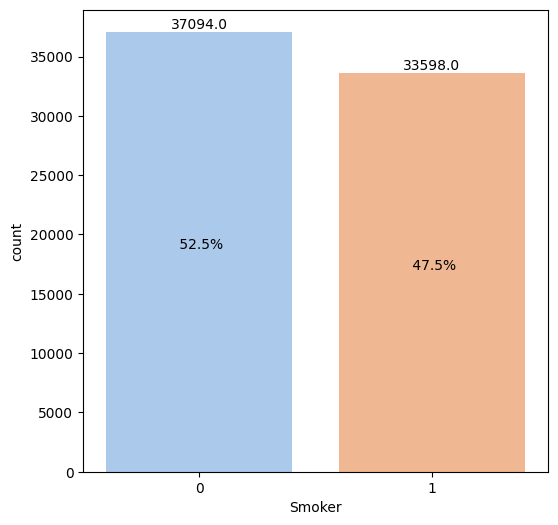

In [32]:
plot_univariate('Smoker')

Non-smokers are slightly more in number (52.5%)

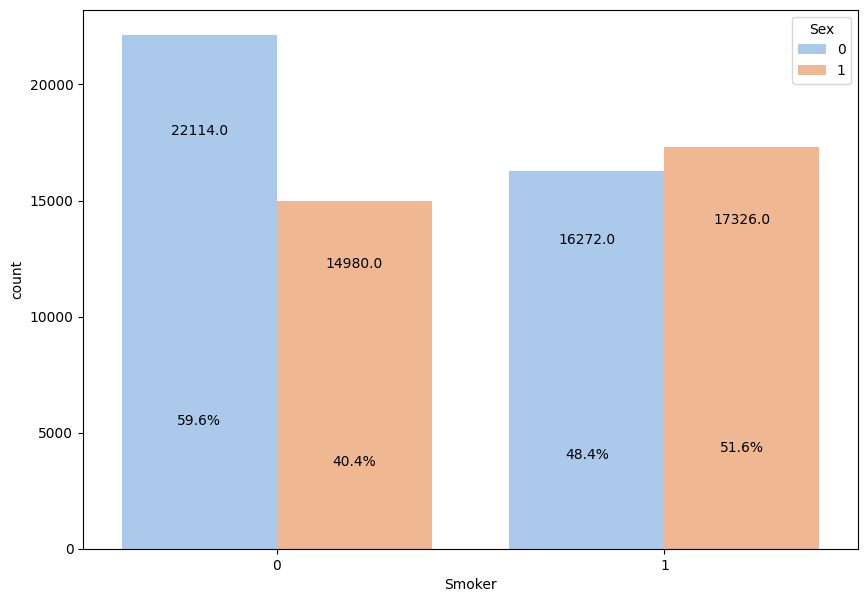

In [33]:
plot_bivariate('Smoker','Sex')

* 59.6% of women are non-smokers. Smoking is prevalent in men compared to women.

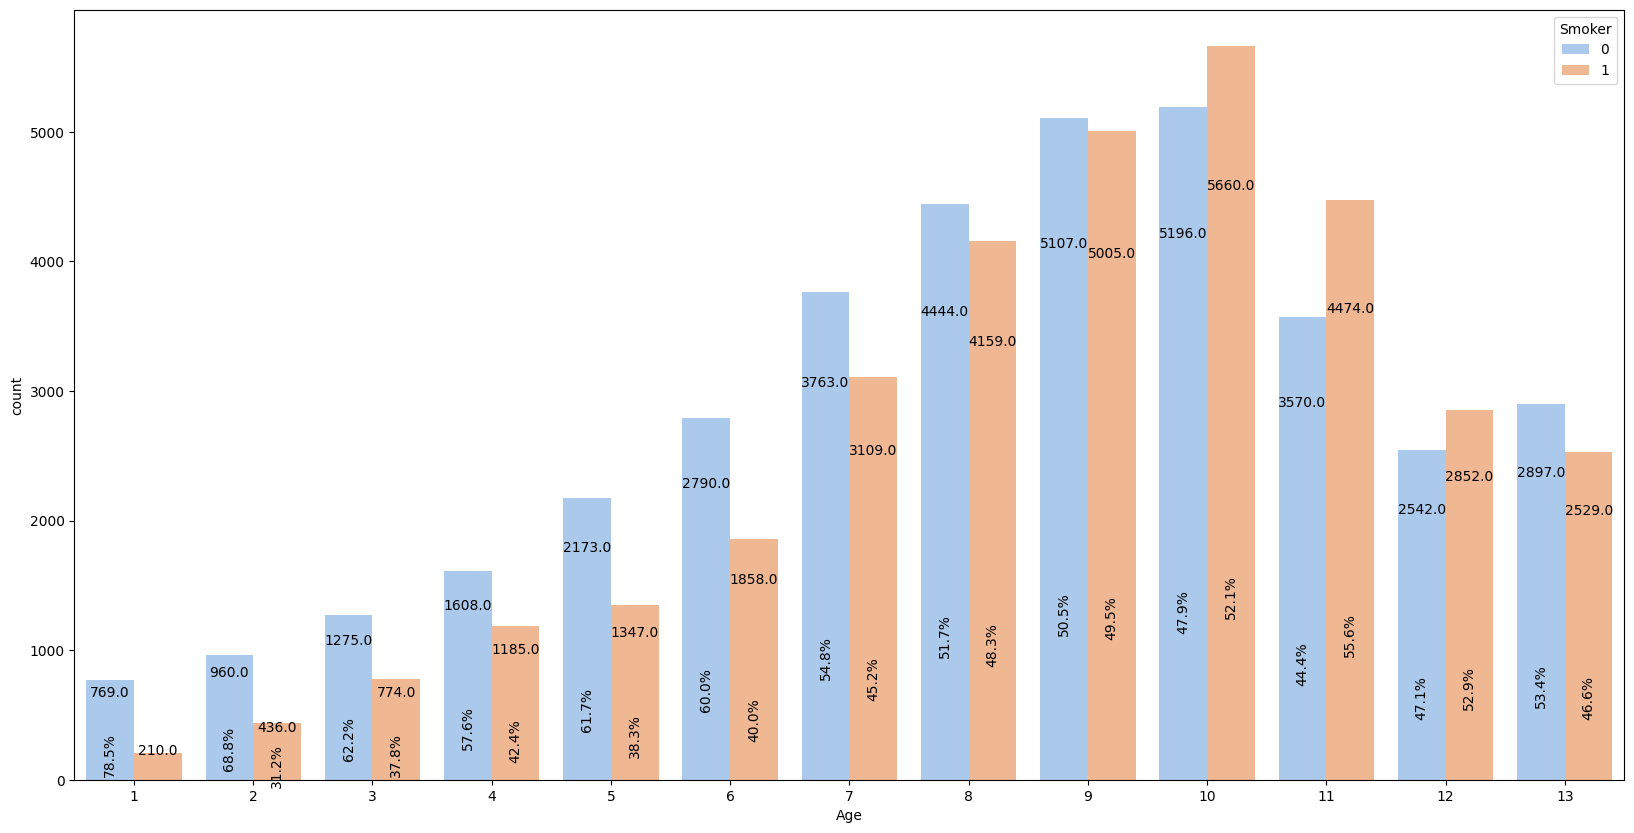

In [34]:
plot_bivariate('Age', 'Smoker')

There are more smokers compared to non-smokers in age groups 10, 11 and 12.

In [35]:
# plot_bivariate('Smoker','Hypertension')

Smokers are more likely to be hypertensive compared to non smokers

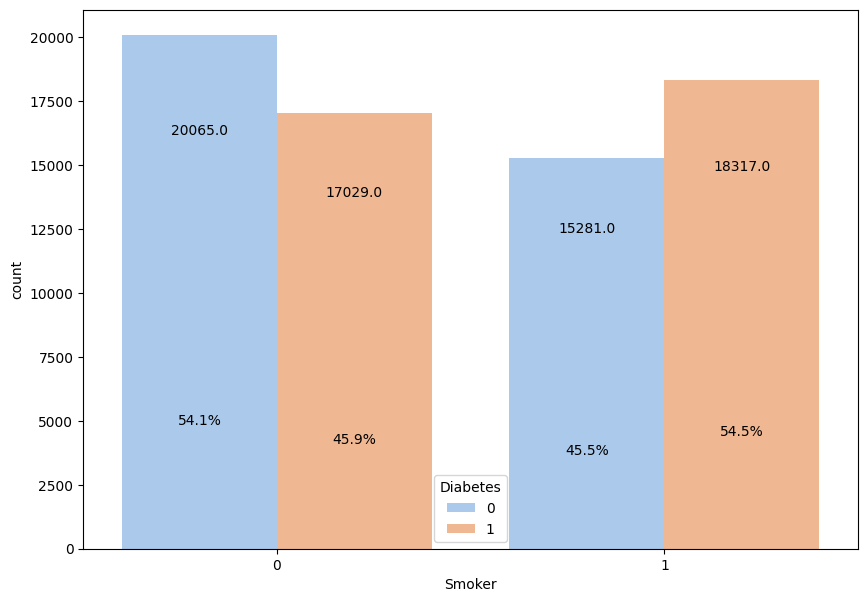

In [36]:
plot_bivariate('Smoker', 'Diabetes')

In a similar trend, smokers are likely to be diabetic (54.5% of smokers are diabetic compared to 45.9% among non-smokers)

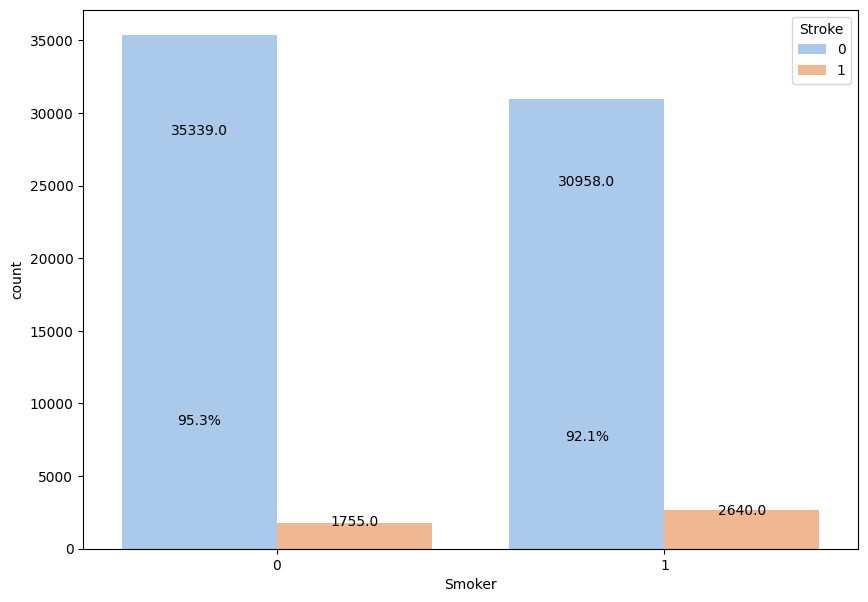

In [37]:
plot_bivariate('Smoker','Stroke')

Smokers are likely to suffer Strokes compared to non-smokers

#### HeartDiseaseorAttack

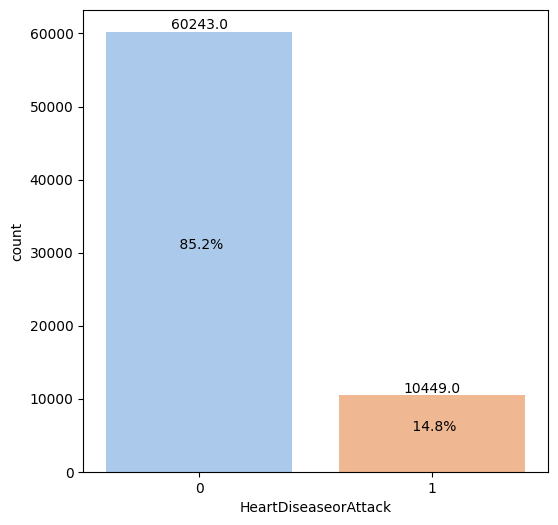

In [38]:
plot_univariate('HeartDiseaseorAttack')

There are only 14.8% of total samples with Heart disease or heart attack.

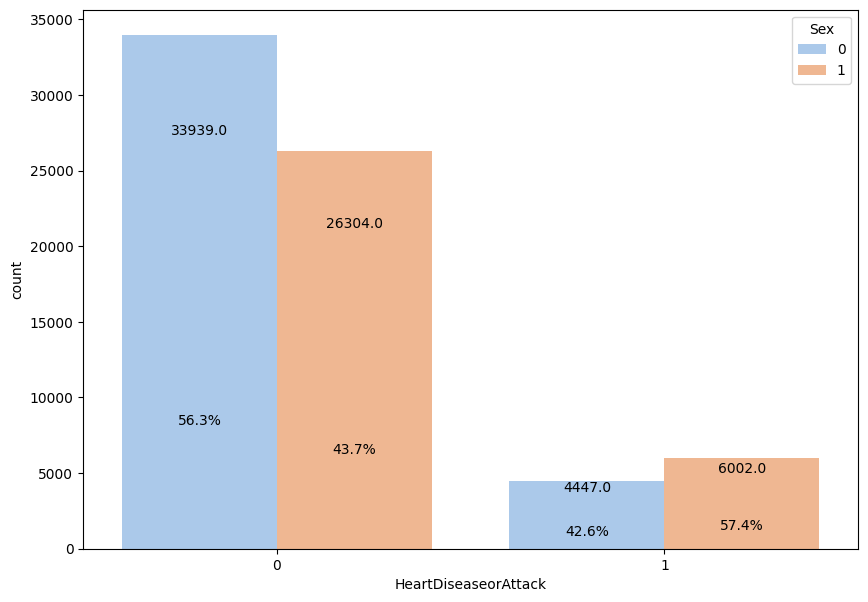

In [39]:
plot_bivariate('HeartDiseaseorAttack','Sex')

Interestingly, men are more likely to develop heart diseases.

In [40]:
# plot_bivariate('HeartDiseaseorAttack','Hypertension')

Clearly, people with hypertension are verly likely to develop heart disease (81.4%).

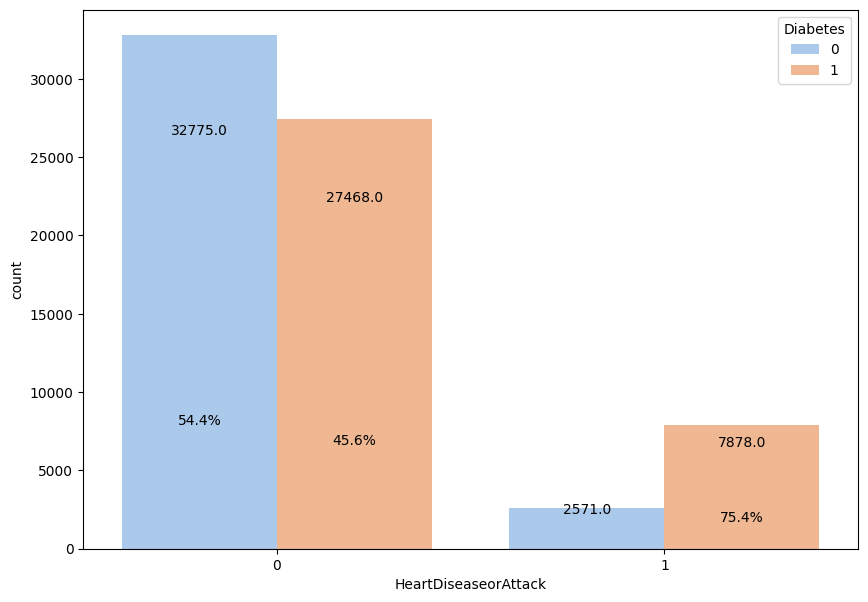

In [41]:
plot_bivariate('HeartDiseaseorAttack','Diabetes')

A similar trend is observed wherein heart diseases are more prevalant in diabetics.

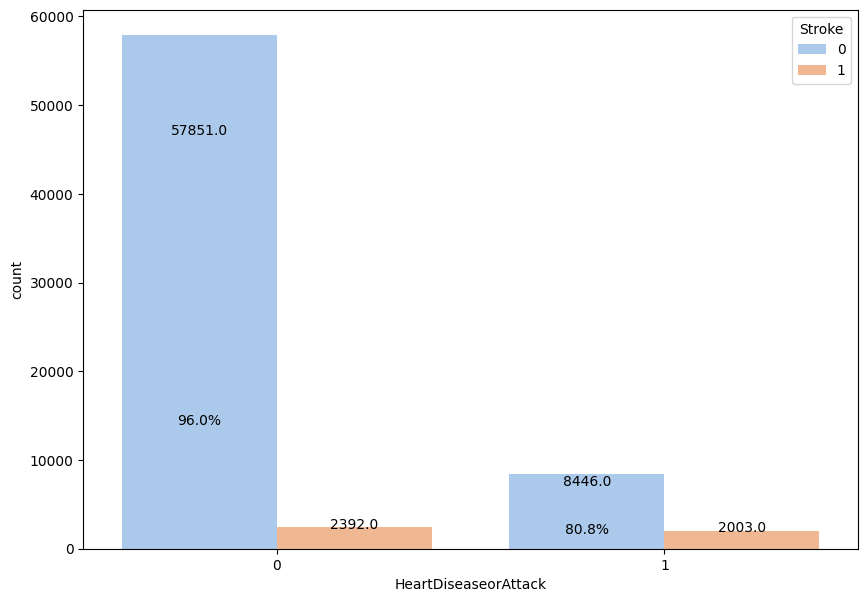

In [42]:
plot_bivariate('HeartDiseaseorAttack','Stroke')

Similar trend is observed.

#### PhysActivity

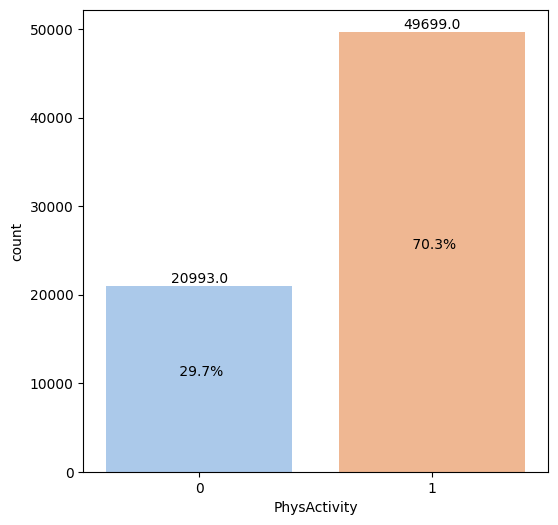

In [43]:
plot_univariate('PhysActivity')

70.3% of people have reported that they have participated in physical activity in the past 30 days

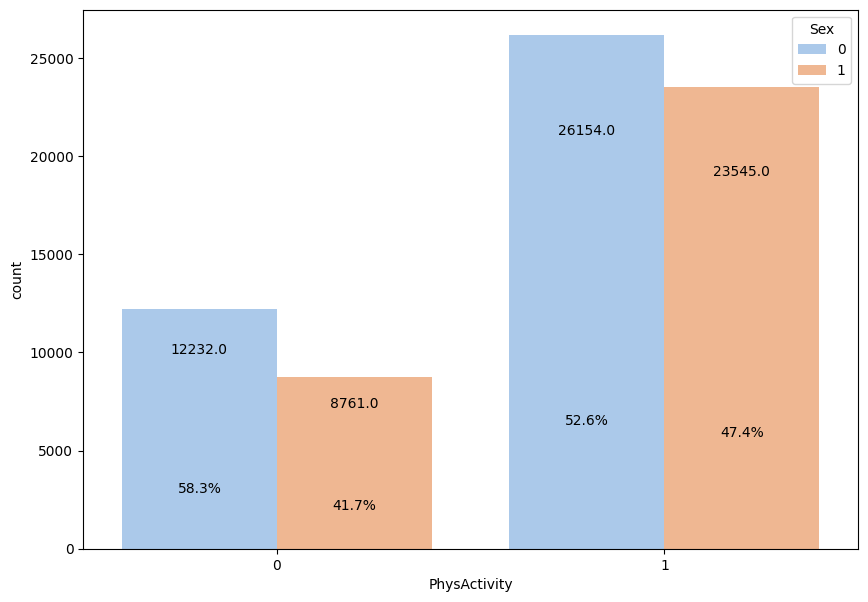

In [44]:
plot_bivariate('PhysActivity','Sex')

Among people who have reported physical activity, Women are marginally better compared to men. (52.6% vs 47.4%) 

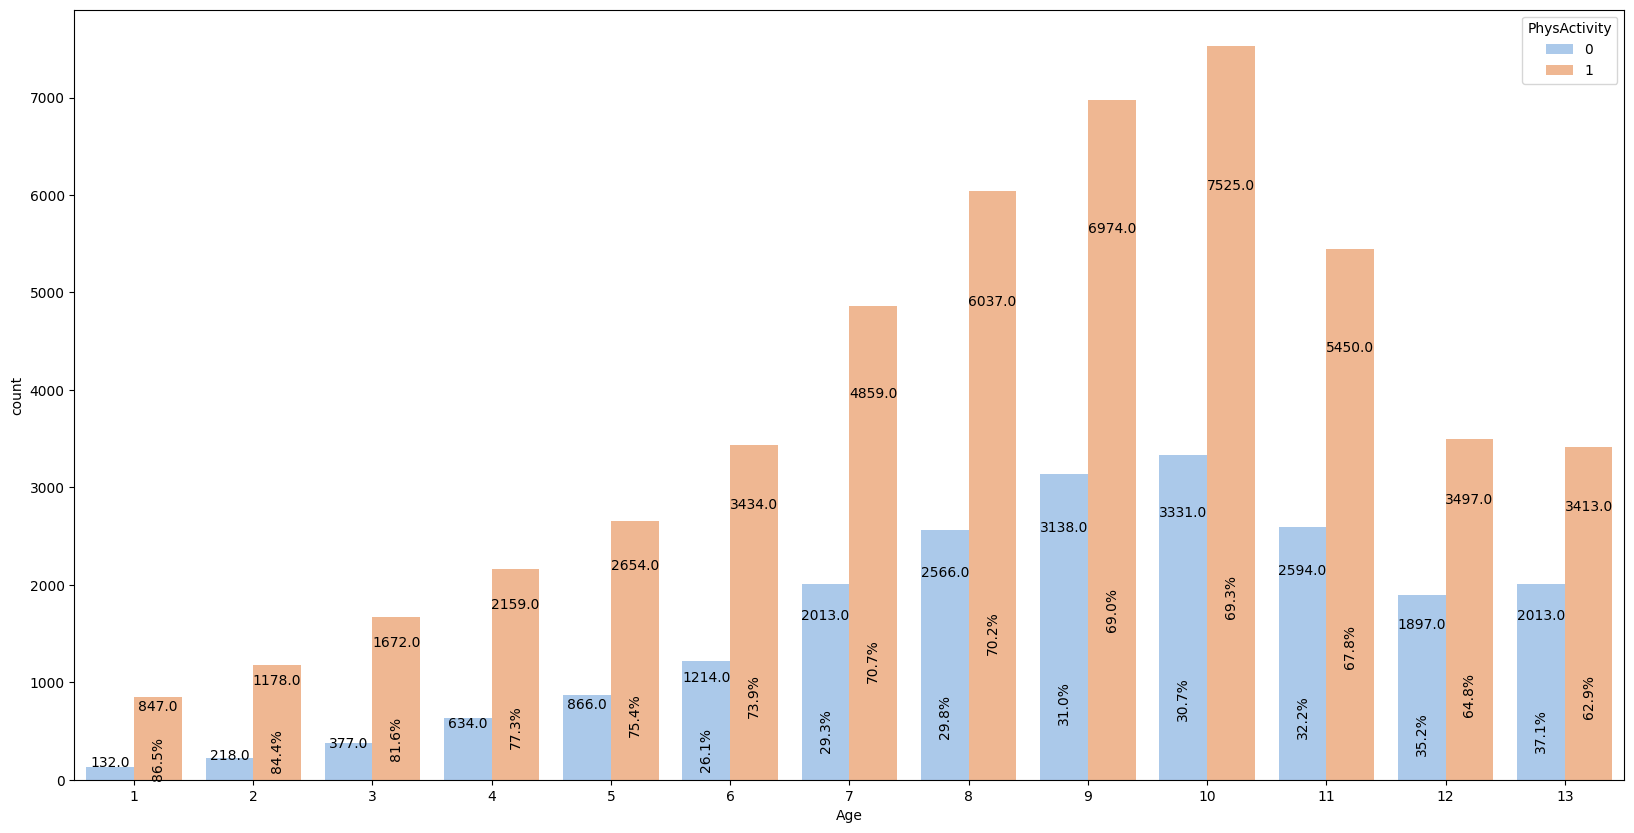

In [45]:
plot_bivariate('Age','PhysActivity')

Physical activity is higher in younger population i.e. age groups 1,2 

In [46]:
# plot_bivariate('PhysActivity','Hypertension')

66.7% of people who do not report physical activity are also hypertensive.

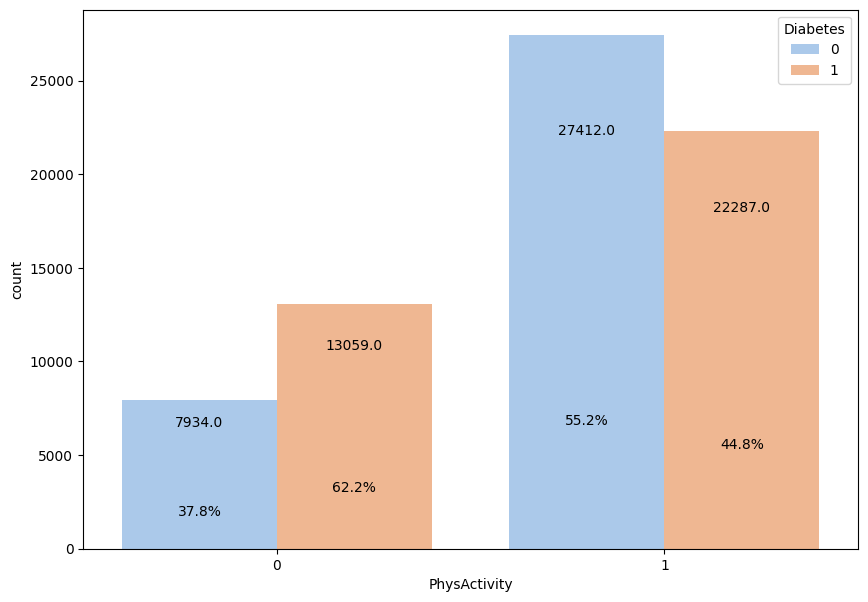

In [47]:
plot_bivariate('PhysActivity','Diabetes')

The risk of diabetes is considerably lower in people who have reported physical activity.

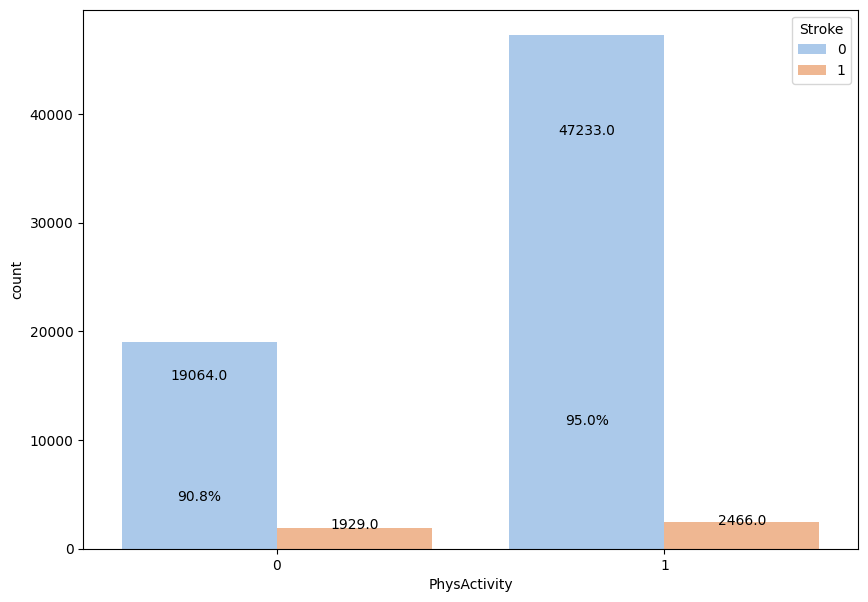

In [48]:
plot_bivariate('PhysActivity', 'Stroke')

There is a weak trend to indicate likelihood of stroke in people who do not report physical activity.

#### Fruits

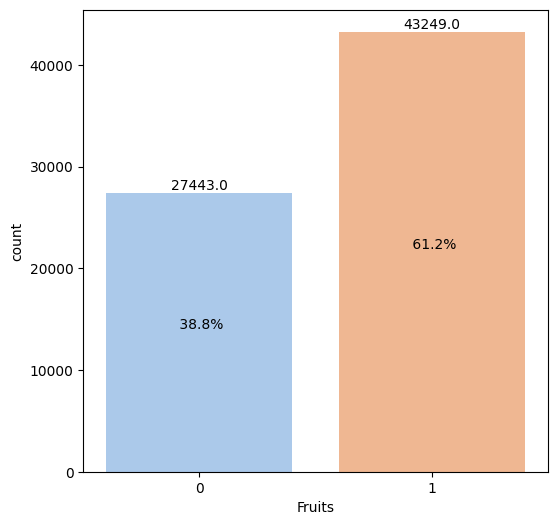

In [49]:
plot_univariate('Fruits')

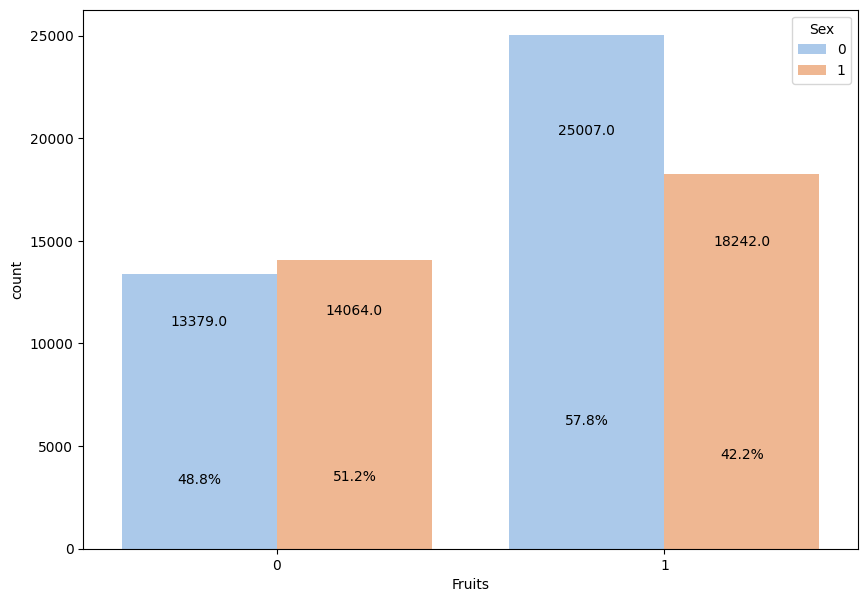

In [50]:
plot_bivariate('Fruits','Sex')

Women are more likely to eat fruits atleast once per day compared to men. 57.8% of people who report consuming fruits are women.

In [51]:
# plot_bivariate('Fruits','Hypertension')

The evidence is not very strong to suggest any relationship between hypertension and fruit consumption.

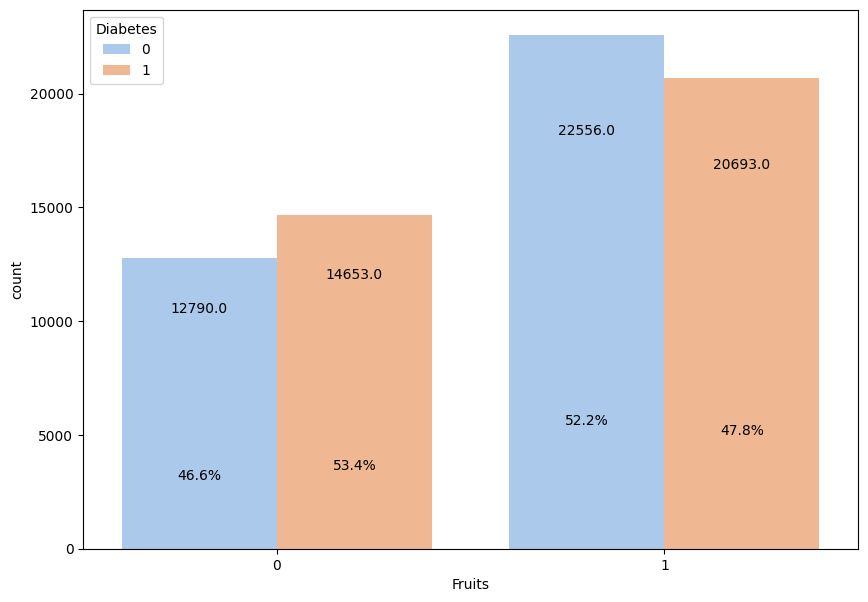

In [52]:
plot_bivariate('Fruits','Diabetes')

There is less prevalance of diabetes in people who consume fruits.

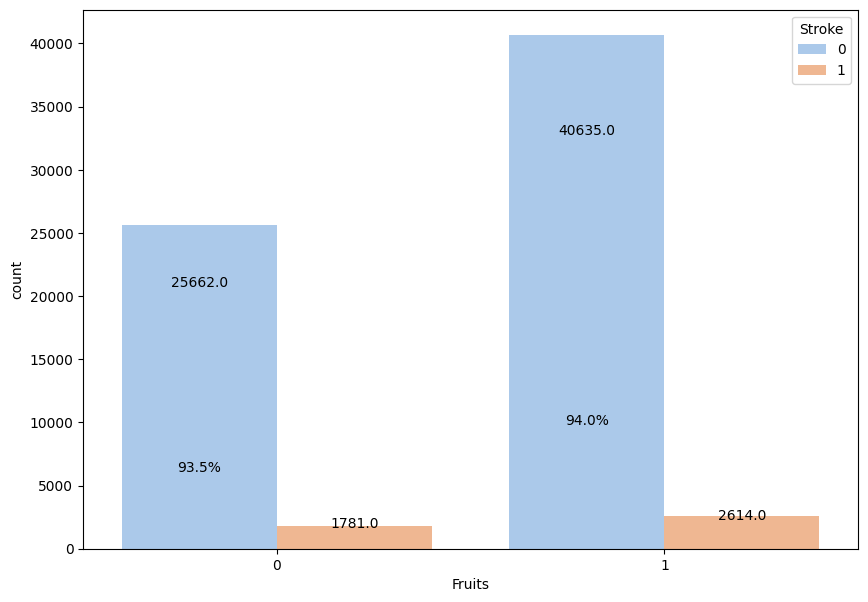

In [53]:
plot_bivariate('Fruits','Stroke')

There is no conclusive proof that fruit consumption is linked to possibility of Stroke.

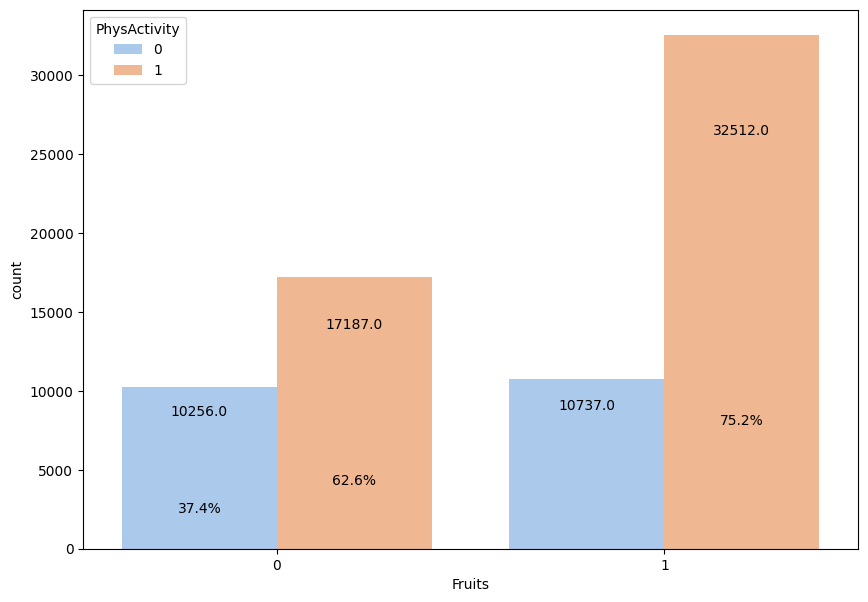

In [54]:
plot_bivariate('Fruits','PhysActivity')

This is an interesting trend. Those who are physically active are more likely to consume fruits at least once a day.

#### Veggies

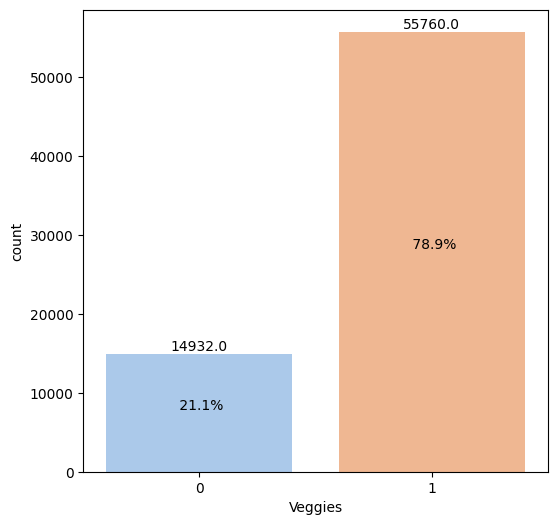

In [55]:
plot_univariate('Veggies')

78.9% of total respondents consume vegetables atleast once a day.

In [56]:
# plot_bivariate('Veggies','Hypertension')

The evidence indicates that, people who do not consume vegetables are more likely to develop hypertension.

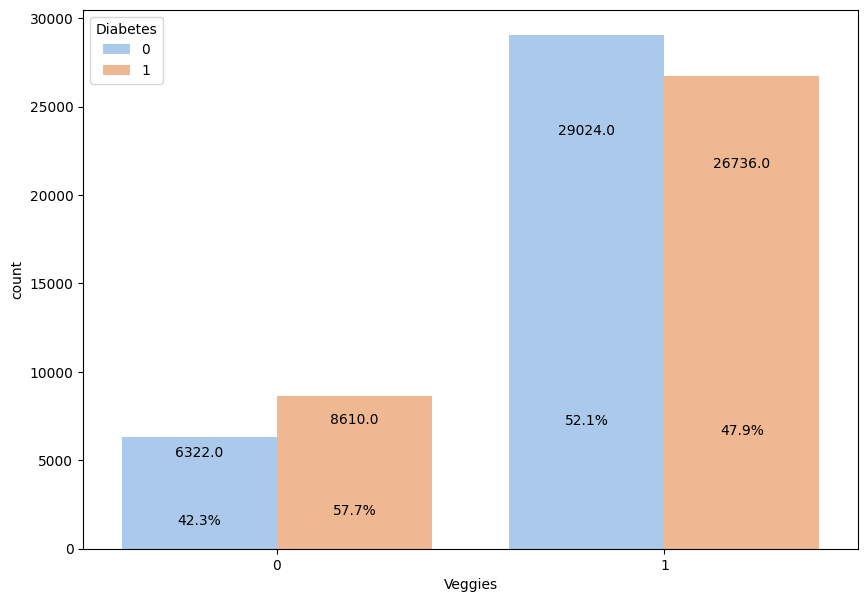

In [57]:
plot_bivariate('Veggies','Diabetes')

Diabetes is more prevalant in people who do not consume vegetables. (57.7% vs 42.3%)

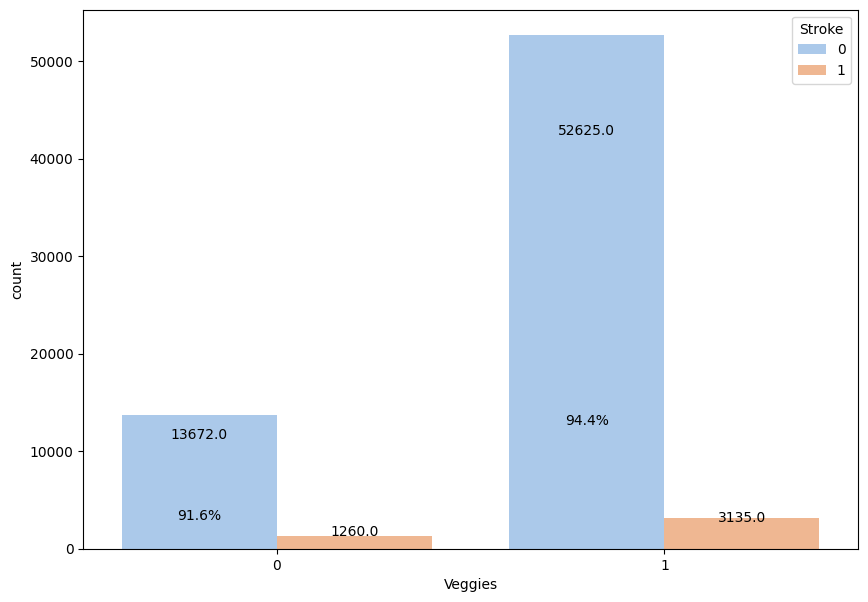

In [58]:
plot_bivariate('Veggies','Stroke')

#### HvyAlcoholConsump

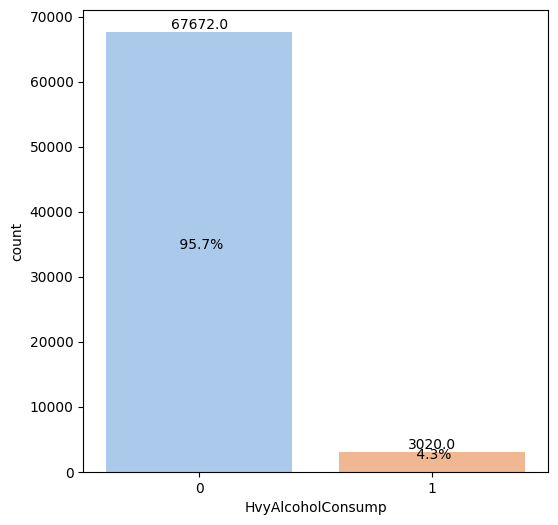

In [59]:
plot_univariate('HvyAlcoholConsump')

There are only 4.3% of people who have reported heavy alcohol consumption.

In [60]:
# plot_bivariate('HvyAlcoholConsump','Hypertension')

There is no significant proof that heavy alcohol consumption is linked to hypertension.

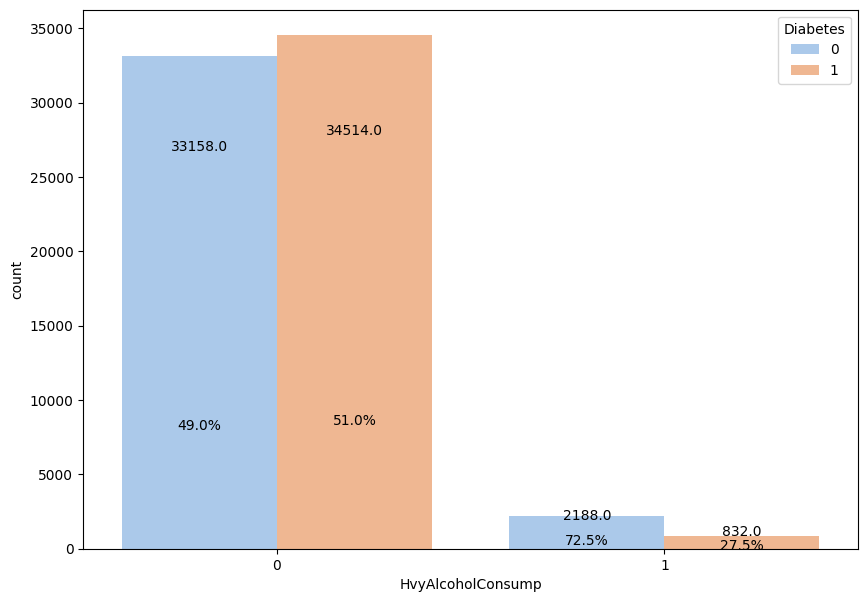

In [61]:
plot_bivariate('HvyAlcoholConsump','Diabetes')

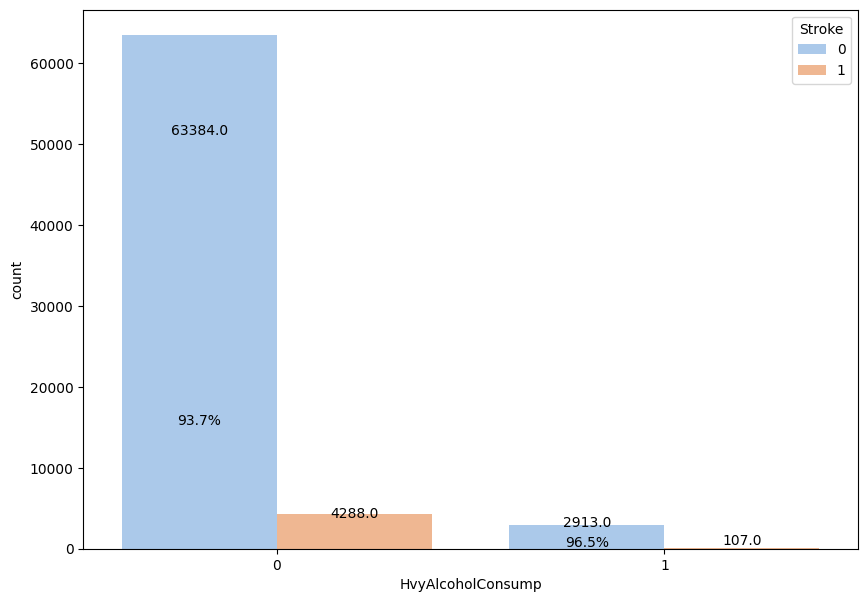

In [62]:
plot_bivariate('HvyAlcoholConsump','Stroke')

In [63]:
spearman(df,'HvyAlcoholConsump')

,Feature Name,correlation coefficient,Inference
0,Age,-0.056264,Some correlation (reject H0)
1,Sex,0.014164,Some correlation (reject H0)
2,HighChol,-0.025443,Some correlation (reject H0)
3,CholCheck,-0.027146,Some correlation (reject H0)
4,BMI,-0.063088,Some correlation (reject H0)
5,Smoker,0.077835,Some correlation (reject H0)
6,HeartDiseaseorAttack,-0.037130,Some correlation (reject H0)
7,PhysActivity,0.019111,Some correlation (reject H0)
8,Fruits,-0.033246,Some correlation (reject H0)
9,Veggies,0.022090,Some correlation (reject H0)


The correlation coefficients are also very weak. In conclusion heavy alcohol consumption is not a significant feature.

#### GenHlth

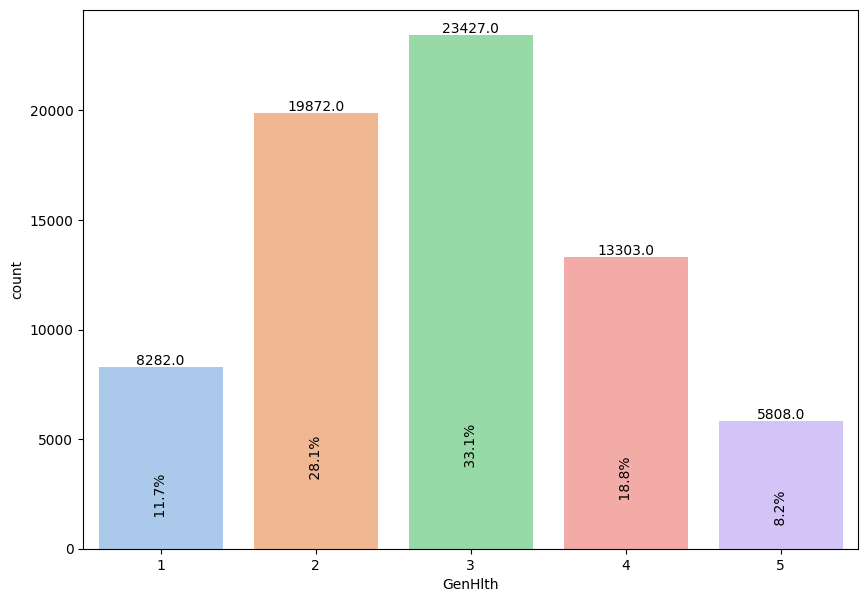

In [64]:
plot_univariate('GenHlth')

More than 70% of the respondents have responded with general health rating of 3 and lower. i.e. Excellent, Very Good and Good. 

In [65]:
# plot_bivariate('GenHlth','Hypertension')

* It is significant that, people who have reported poor general health are more likely to be hypertensive. (78.7% among such respondents are hypertensive)
* Hypertension is more prevalent in respondents who have rated 3, 4 and 5.

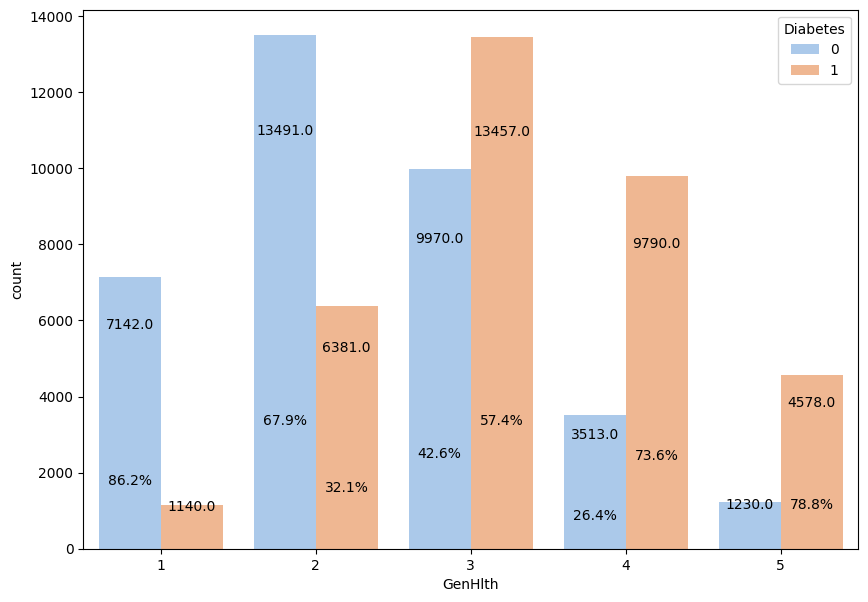

In [66]:
plot_bivariate('GenHlth','Diabetes')

The trends are exactly similar to hypertension case.

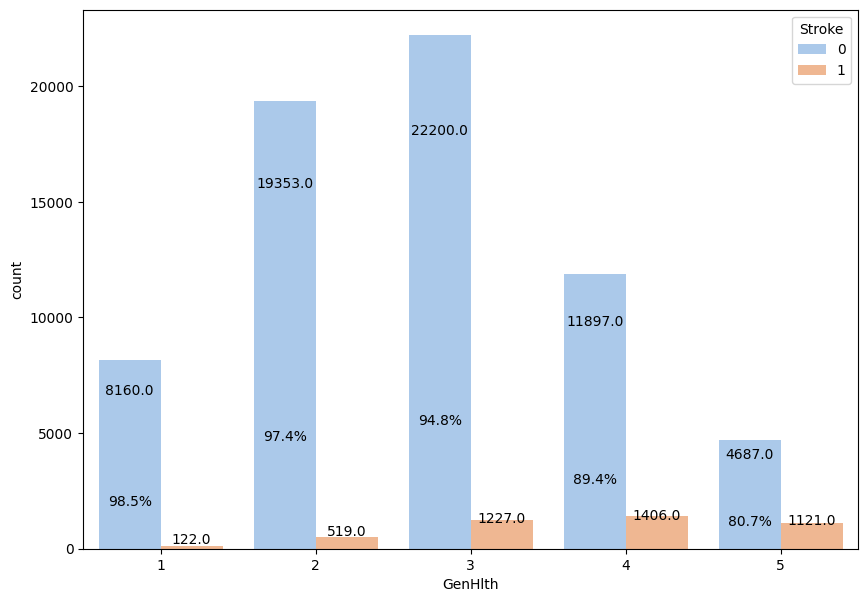

In [67]:
plot_bivariate('GenHlth','Stroke')

Around 20% of the respondents who have rated 5 have reported an episode of stroke.

In [68]:
spearman(df, 'GenHlth')

,Feature Name,correlation coefficient,Inference
0,Age,0.138755,Some correlation (reject H0)
1,Sex,-0.014038,Some correlation (reject H0)
2,HighChol,0.239138,Some correlation (reject H0)
3,CholCheck,0.060257,Some correlation (reject H0)
4,BMI,0.284265,Some correlation (reject H0)
5,Smoker,0.149960,Some correlation (reject H0)
6,HeartDiseaseorAttack,0.268815,Some correlation (reject H0)
7,PhysActivity,-0.270967,Some correlation (reject H0)
8,Fruits,-0.099559,Some correlation (reject H0)
9,Veggies,-0.117258,Some correlation (reject H0)


From the correlation coefficients table, General health is strongly correlated to physical health, difficulty in walking, diabetes and hypertension. As such, this is one of the most important features. 

#### MentHlth

In [69]:
spearman(df,'MentHlth')

,Feature Name,correlation coefficient,Inference
0,Age,-0.167929,Some correlation (reject H0)
1,Sex,-0.128121,Some correlation (reject H0)
2,HighChol,0.070608,Some correlation (reject H0)
3,CholCheck,-0.016960,Some correlation (reject H0)
4,BMI,0.086932,Some correlation (reject H0)
5,Smoker,0.062012,Some correlation (reject H0)
6,HeartDiseaseorAttack,0.051228,Some correlation (reject H0)
7,PhysActivity,-0.097845,Some correlation (reject H0)
8,Fruits,-0.060025,Some correlation (reject H0)
9,Veggies,-0.040767,Some correlation (reject H0)


Mental health is strongly correlated with physical health, general health and difficulty in walking.

#### PhysHlth

In [70]:
spearman(df,'PhysHlth')

,Feature Name,correlation coefficient,Inference
0,Age,0.044262,Some correlation (reject H0)
1,Sex,-0.070312,Some correlation (reject H0)
2,HighChol,0.148801,Some correlation (reject H0)
3,CholCheck,0.032653,Some correlation (reject H0)
4,BMI,0.166514,Some correlation (reject H0)
5,Smoker,0.101203,Some correlation (reject H0)
6,HeartDiseaseorAttack,0.184961,Some correlation (reject H0)
7,PhysActivity,-0.208013,Some correlation (reject H0)
8,Fruits,-0.050328,Some correlation (reject H0)
9,Veggies,-0.060997,Some correlation (reject H0)


Physical health is substantially correlated to general health and mental health.

#### DiffWalk

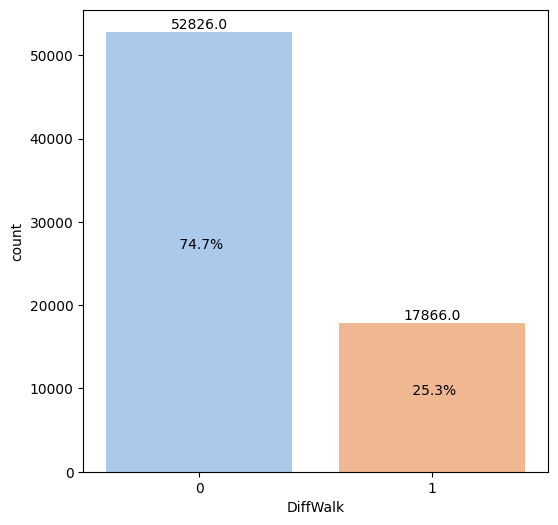

In [71]:
plot_univariate('DiffWalk')

25.3% of the respondents have reported difficulty in walking.

In [72]:
# plot_bivariate('DiffWalk','Hypertension')

76.4% of people who reported difficulty in walking are hypertensive. So difficulty in walking is a good indicator of hypertension.

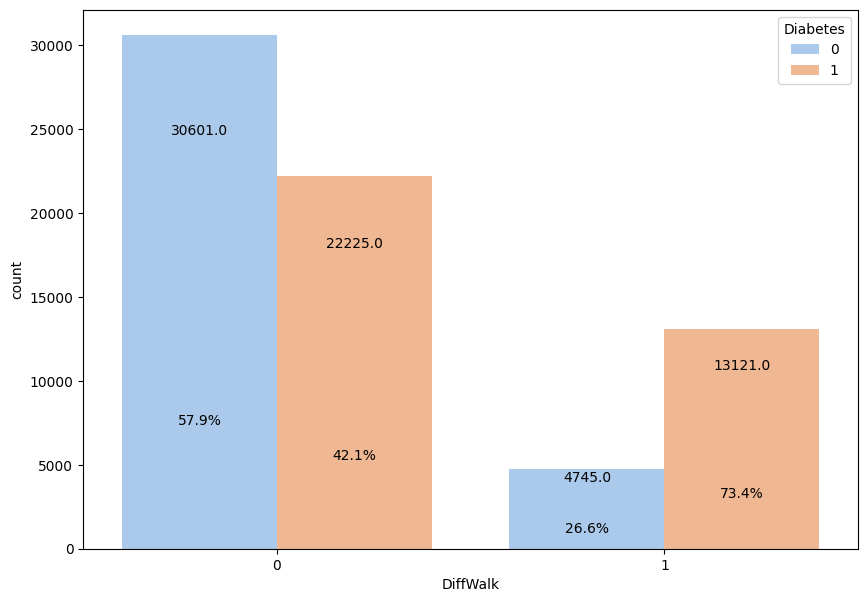

In [73]:
plot_bivariate('DiffWalk','Diabetes')

73.4% of people who have reported difficulty in walking are diabetic.

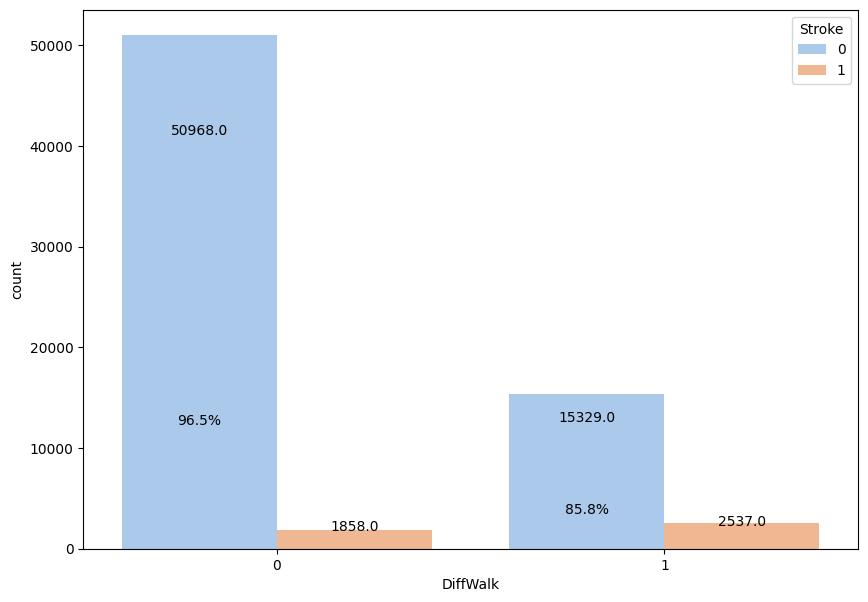

In [74]:
plot_bivariate('DiffWalk','Stroke')

In comparison there are more people with a reported case of stroke among people with difficulty in walking.

#### Diabetes and Hypertension

In [75]:
# plot_bivariate('Hypertension','Diabetes')

Those who are hypertensive are very likely to be diabetic (66.8% of people who are hypertensive are also diabetic)

### Model (Target Features: Hypertension, Diabetes, Stroke)

<Axes: >

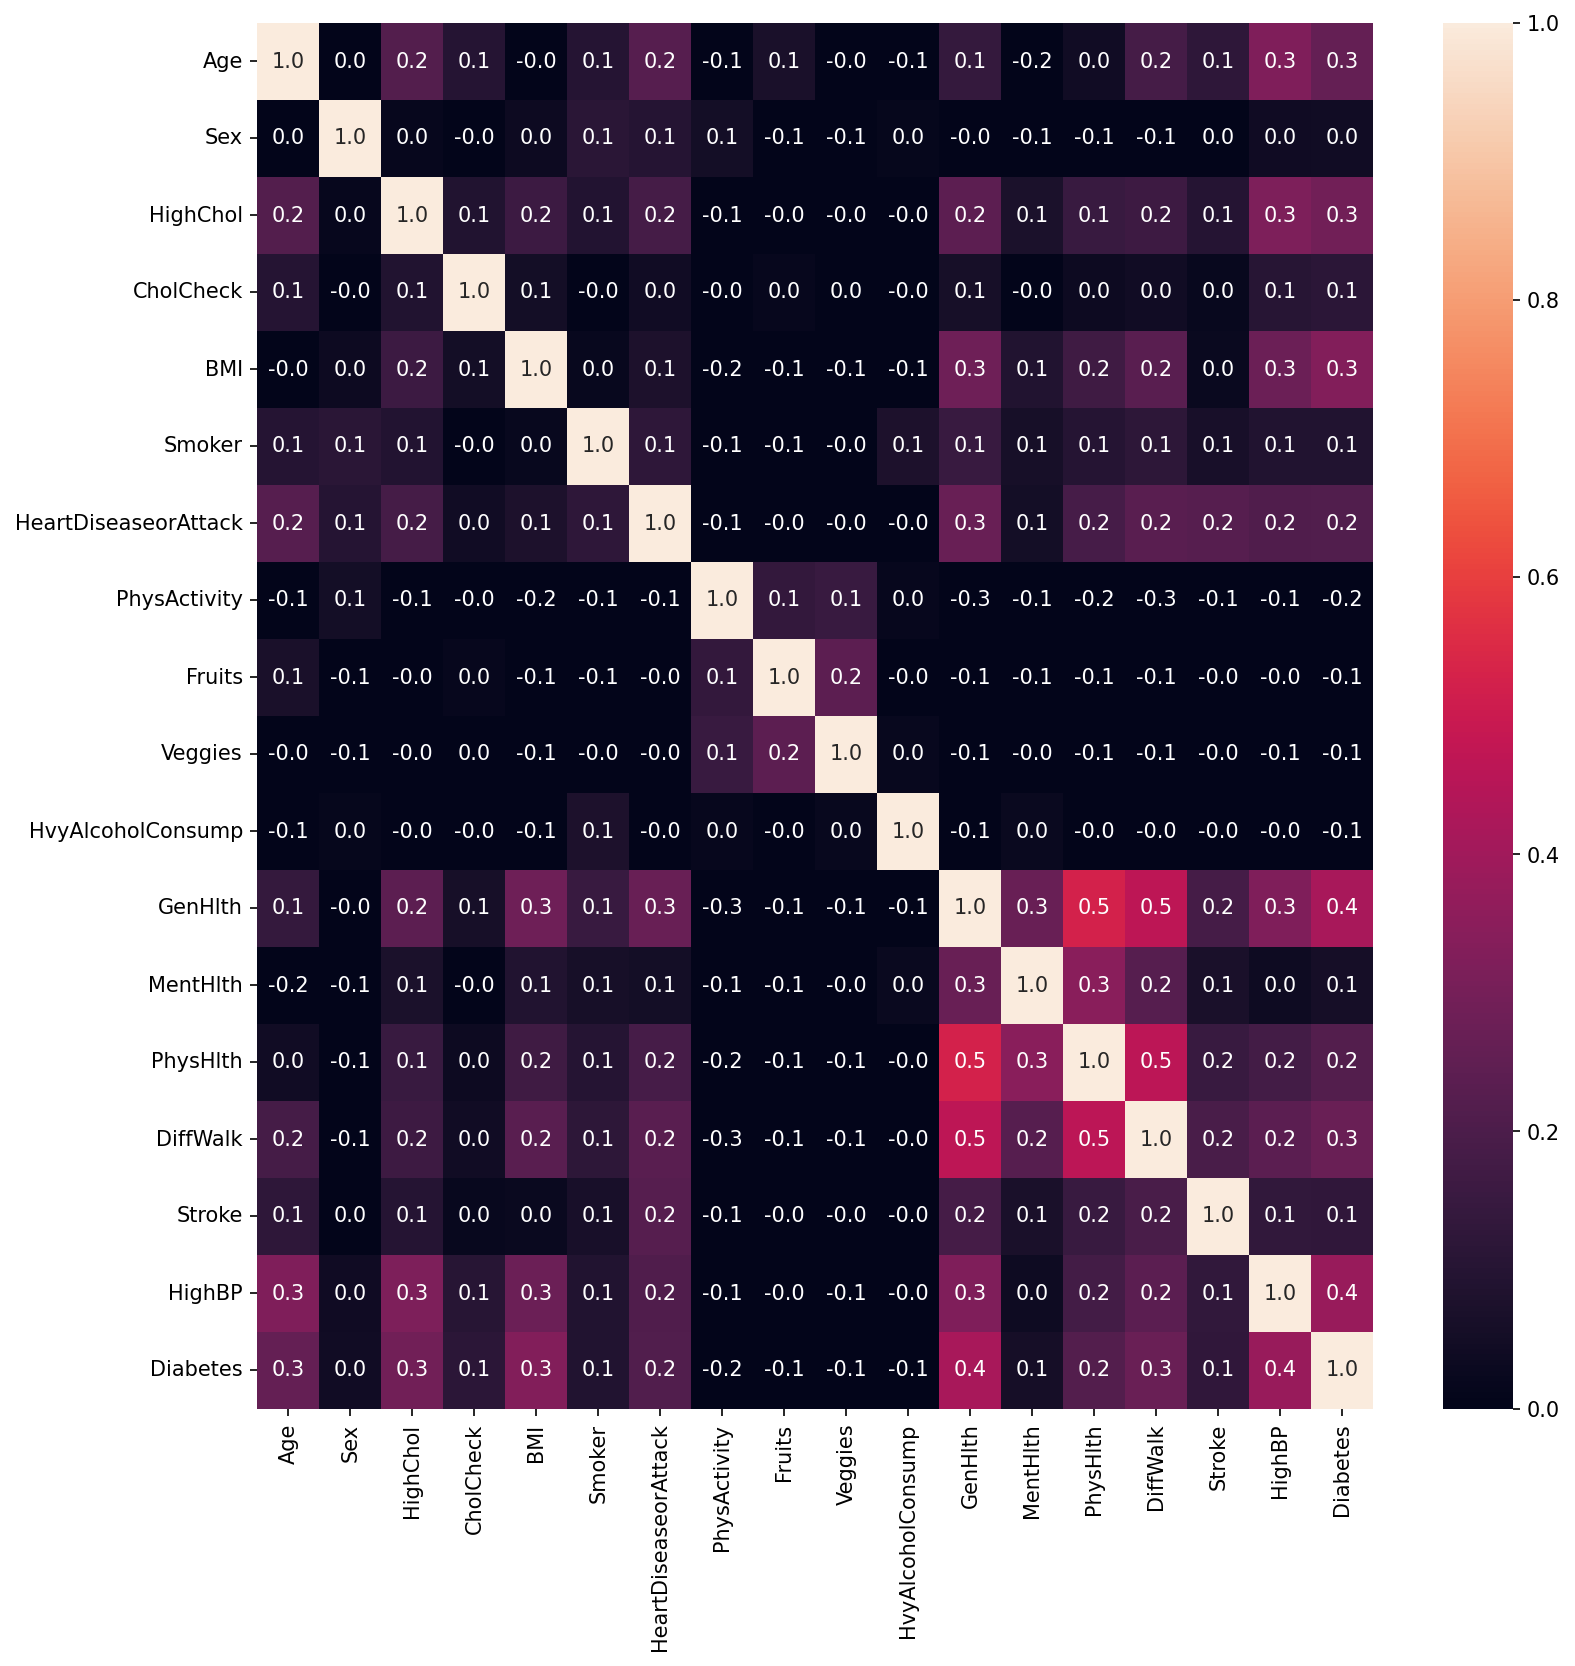

In [76]:
plt.figure(figsize=(12,12),dpi=150)
sns.heatmap(df.corr(method='spearman'),vmin=0,fmt='.1f',annot=True)

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate

In [78]:
features_dropped = ['CholCheck','HvyAlcoholConsump']
df1 = df.drop(features_dropped,axis=1)

In [79]:
df1.columns

Index(['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

**Splitting data into independent and dependent features**
* The target selected is Diabetes and Hypertension

In [87]:
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score 
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from sklearn.inspection import permutation_importance

In [88]:
from yellowbrick.classifier import ROCAUC

In [ ]:
f1 = make_scorer(f1_score)
recall = make_scorer(recall_score)
precision = make_scorer(precision_score)

* **Classifier**: XGB Classifier
* **Classification Metric**: f1 score
* The base model hyper parameters are tuned to improve f1 score.
* ROC-AUC is calculated.
* Important features are estimated.

***NOTE: About the function,***
* The following function takes the **target feature, model and hyper parameter grid as input**.
* The dataset is split into train and test sets with test set size of 0.33. Stratified split is used.
* A **column transformer** is used to scale numerical features and one hot encode categorical features.
* A **pipeline** with column tranformer and classifier is fit on training data and tested on test data.
* The classification report with confusion matrix is presented.
* Hyper tuning of parameters is carried out with 5 fold cross validation for 20 iterations resulting in 100 fits using **Randomized Search**.
* The best model parameters and model performance is presented along with **ROC-AUC characteristics**.
* Important features are found out using **Permutation Importance**.

In [89]:
def model(target, ml_model, parameters):

    # Train-Test Split

#     X = df1.drop(['Hypertension','Diabetes','Stroke'],axis=1)
    X = df1.drop(['Diabetes','Stroke'],axis=1)
    y = df1[target]
    
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=1)
    
    num_cols = ['BMI','MentHlth','PhysHlth']
    cat_cols = ['Age', 'Sex', 'HighChol', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'DiffWalk']
    
    # Preprocessing 

    transform = [('sc',StandardScaler(),X_train[num_cols].columns),
             ('ohe',OneHotEncoder(handle_unknown='ignore',drop='if_binary'),X_train[cat_cols].columns)]
    col_transform = ColumnTransformer(transformers=transform)
    
    # Pipeline 

    classifier = ml_model

    pipe = Pipeline([
    ('col', col_transform),
    ('classifier', classifier)
    ])

    # Training and Testing

    pipe.fit(X_train, y_train)
 
    print('** Base Model **')
    print()
    print('Accuracy Score of train data : %0.2f'%pipe.score(X_train,y_train))
    print('Accuracy Score of test data  : %0.2f'%pipe.score(X_test,y_test))

    y_pred = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    print('f1-Score of train data       : %0.2f'%f1_score(y_train,y_pred_train, average='weighted'))
    print('f1-Score of test data        : %0.2f'%f1_score(y_test,y_pred, average='weighted'))

    print('\n Classification Report for Test Data (Base Model)\n')
    print(metrics.classification_report(y_test, y_pred))


    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='Greens')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix (Base Model)')
    plt.show()
    
    # Training with cross validation
    print()
    print('**Cross-Validated Training**\n')
    
    train = cross_validate(pipe, X_train, y_train, scoring= 'f1_weighted' ,cv=5,n_jobs=-1)
    print('Cross-Validated training f1 score: %.2f'%train['test_score'].mean())
    print()
    
    # Hyper-parameter tuning
    if(parameters is not None):
        print('_________________________________________________________________________________')
        print()
        print('** Hyper-Parameter tuning **\n')
        parameters = parameters

        random_cv = RandomizedSearchCV(
            pipe,
            parameters,
            n_iter  = 20,
            cv      = 5,
            scoring = {'f1':'f1_weighted','precision':precision},
            refit   = 'f1',
            n_jobs  = -1,
            verbose = 1)

        random_cv.fit(X_train,y_train)

        print('Best Parameters:\n')
        print(random_cv.best_params_)

        model_best = random_cv.best_estimator_
        model_best.fit(X_train,y_train)
        y_pred_tuned = model_best.predict(X_test)

        print()
        print('The test f1 score after tuning : %.2f'%f1_score(y_test,y_pred_tuned, average='weighted'))
        print()

        print('\n Classification Report for Test Data (Hypertuned Model) \n')
        print(metrics.classification_report(y_test, y_pred_tuned))
        cm = metrics.confusion_matrix(y_test,y_pred_tuned)

        fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='Greens')
        plt.xlabel('Predictions')
        plt.ylabel('Actuals')
        plt.title('Confusion Matrix (Hypertuned)')
        plt.show()
        print()
        print('ROC-AUC\n')
        visualizer = ROCAUC(model_best, classes=["No", "Yes"])

        visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)        # Evaluate the model on the test data
        visualizer.show()                       # Finalize and show the figure

        print('______________________________________________________________________________')
        print()
        print('**Important Features**\n')

        imp_test = permutation_importance(model_best, X_test, y_test, n_repeats=5, random_state=1, scoring='f1_weighted' )
        
        importance_test_f1  = imp_test.importances_mean
        importance_result   = pd.DataFrame({'Features':X_test.columns,'test_f1':importance_test_f1}).sort_values(by=['test_f1'],ascending=False, key=abs).head(20)
        display(importance_result)
        print()
        imp_features = importance_result['Features'].where(importance_result['test_f1']!=0).dropna()
        print('Number of important features with permutation importance != 0: ',len(imp_features))
        
    else:
        print()

### Classification of Hypertension

In [90]:
# parameters = {    
#     'classifier__n_estimators'  : np.arange(100,150,2),
#     'classifier__max_depth'     : np.arange(1,10,1),
#     'classifier__learning_rate' : np.arange(0.1,0.5,0.1),
#     'classifier__subsample'      :np.arange(0.5,1,0.1),
#     'classifier__scale_pos_weight':np.arange(0,2,0.1)
# }

# model('Hypertension',XGBClassifier(random_state=1),parameters)

### Classification of Diabetes

** Base Model **

Accuracy Score of train data : 0.77
Accuracy Score of test data  : 0.73
f1-Score of train data       : 0.77
f1-Score of test data        : 0.73

 Classification Report for Test Data (Base Model)

              precision    recall  f1-score   support

           0       0.76      0.69      0.72     11664
           1       0.71      0.78      0.74     11665

    accuracy                           0.73     23329
   macro avg       0.73      0.73      0.73     23329
weighted avg       0.73      0.73      0.73     23329



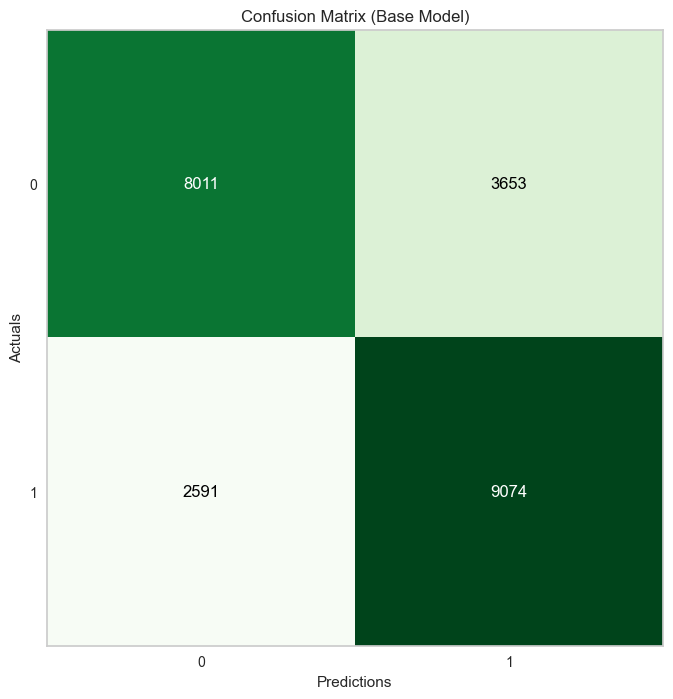


**Cross-Validated Training**

Cross-Validated training f1 score: 0.74

_________________________________________________________________________________

** Hyper-Parameter tuning **



NameError: name 'precision' is not defined

In [91]:
parameters = {    
    'classifier__n_estimators'  : np.arange(100,150,2),
    'classifier__max_depth'     : np.arange(1,10,1),
    'classifier__learning_rate' : np.arange(0.1,0.5,0.1),
    'classifier__subsample'      :np.arange(0.5,1,0.1),
    'classifier__scale_pos_weight':np.arange(0,2,0.1)
}
model('Diabetes',XGBClassifier(random_state=1),parameters)

** Base Model **

Accuracy Score of train data : 0.94
Accuracy Score of test data  : 0.94
f1-Score of train data       : 0.92
f1-Score of test data        : 0.91

 Classification Report for Test Data (Base Model)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21879
           1       0.27      0.02      0.04      1450

    accuracy                           0.94     23329
   macro avg       0.60      0.51      0.50     23329
weighted avg       0.90      0.94      0.91     23329



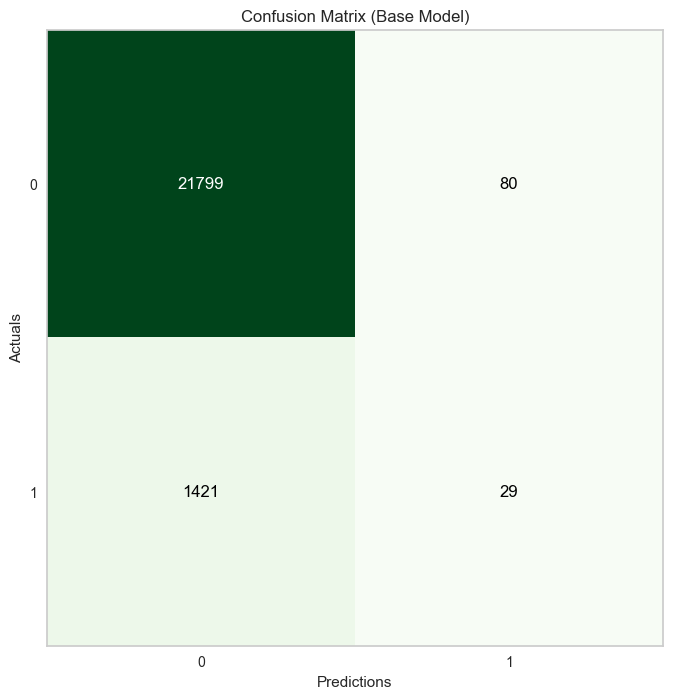


**Cross-Validated Training**

Cross-Validated training f1 score: 0.91

_________________________________________________________________________________

** Hyper-Parameter tuning **



NameError: name 'precision' is not defined

In [92]:
parameters = {    
    'classifier__n_estimators'  : np.arange(100,150,2),
    'classifier__max_depth'     : np.arange(1,10,1),
    'classifier__learning_rate' : np.arange(0.1,0.5,0.1),
    'classifier__subsample'      :np.arange(0.5,1,0.1),
    'classifier__scale_pos_weight':np.arange(0,2,0.1)
}
model('Stroke',XGBClassifier(random_state=1),parameters)